In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0
...,...,...,...,...,...,...,...,...,...
995,1,103.496355,41.059401,24.930299,43.675978,25.846062,0.455884,19.905419,0
996,1,60.714150,64.082842,24.689064,111.562745,19.464280,0.250560,44.421874,1
997,0,97.597727,64.122312,22.140339,108.138552,22.733052,0.761463,58.949800,1
998,0,66.775137,55.908797,24.885274,219.521484,31.819187,0.382877,46.928923,0


In [2]:
#round off to clean read 
df = df.round(2)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.86,56.41,24.34,94.39,26.46,0.27,20.10,0
1,2,92.49,70.62,23.44,138.65,23.91,0.67,44.91,0
2,1,88.14,63.26,23.40,149.36,21.95,0.68,48.25,1
3,2,108.45,67.79,20.75,108.75,24.21,0.29,42.75,0
4,1,127.85,94.73,22.60,25.27,33.00,0.60,32.80,0
...,...,...,...,...,...,...,...,...,...
995,1,103.50,41.06,24.93,43.68,25.85,0.46,19.91,0
996,1,60.71,64.08,24.69,111.56,19.46,0.25,44.42,1
997,0,97.60,64.12,22.14,108.14,22.73,0.76,58.95,1
998,0,66.78,55.91,24.89,219.52,31.82,0.38,46.93,0


In [3]:
import numpy as np

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)


In [4]:
df.fillna(df.mean(), inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.86,56.41,24.34,94.39,26.46,0.27,20.10,0
1,2,92.49,70.62,23.44,138.65,23.91,0.67,44.91,0
2,1,88.14,63.26,23.40,149.36,21.95,0.68,48.25,1
3,2,108.45,67.79,20.75,108.75,24.21,0.29,42.75,0
4,1,127.85,94.73,22.60,25.27,33.00,0.60,32.80,0
...,...,...,...,...,...,...,...,...,...
995,1,103.50,41.06,24.93,43.68,25.85,0.46,19.91,0
996,1,60.71,64.08,24.69,111.56,19.46,0.25,44.42,1
997,0,97.60,64.12,22.14,108.14,22.73,0.76,58.95,1
998,0,66.78,55.91,24.89,219.52,31.82,0.38,46.93,0


In [5]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in ['BMI', 'Insulin', 'Glucose']:
    df = remove_outliers_iqr(df, col)

df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.86,56.41,24.34,94.39,26.46,0.27,20.10,0
1,2,92.49,70.62,23.44,138.65,23.91,0.67,44.91,0
2,1,88.14,63.26,23.40,149.36,21.95,0.68,48.25,1
3,2,108.45,67.79,20.75,108.75,24.21,0.29,42.75,0
4,1,127.85,94.73,22.60,25.27,33.00,0.60,32.80,0
...,...,...,...,...,...,...,...,...,...
995,1,103.50,41.06,24.93,43.68,25.85,0.46,19.91,0
996,1,60.71,64.08,24.69,111.56,19.46,0.25,44.42,1
997,0,97.60,64.12,22.14,108.14,22.73,0.76,58.95,1
998,0,66.78,55.91,24.89,219.52,31.82,0.38,46.93,0


In [6]:
df.shape

(977, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,1.774821,99.405445,72.121627,23.282375,83.896428,25.468260,0.448802,43.075169,0.301945
std,1.355189,19.077323,13.889327,1.176665,71.860676,3.567662,0.199572,14.278645,0.459337
min,0.000000,46.300000,31.400000,19.370000,-112.230000,15.790000,0.100000,-0.980000,0.000000
25%,1.000000,86.160000,62.560000,22.500000,35.210000,23.030000,0.280000,33.370000,0.000000
50%,2.000000,98.940000,71.680000,23.290000,84.100000,25.470000,0.450000,43.340000,0.000000
75%,3.000000,113.100000,81.920000,24.050000,133.700000,27.970000,0.620000,52.820000,1.000000
max,8.000000,152.680000,110.720000,26.920000,268.920000,34.840000,0.800000,90.570000,1.000000


In [8]:
print("Rows before dropping:", df.shape[0])
print("Rows with missing values:", df.isnull().any(axis=1).sum())


Rows before dropping: 977
Rows with missing values: 0


In [9]:
#features selection to predict target
y = df.Diagnosis
X = df.drop('Diagnosis', axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [11]:
print(df['Diagnosis'].value_counts())

Diagnosis
0    682
1    295
Name: count, dtype: int64


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#balance only train set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [13]:
smote = SMOTE(sampling_strategy=0.3, random_state=42)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_bal = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test)


In [15]:
#training step:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',class_weight='balanced', max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [16]:
#training step:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [17]:
print(df['Diagnosis'].value_counts())

Diagnosis
0    682
1    295
Name: count, dtype: int64


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test)
print(y_pred[:5]) 
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head())


[1 0 1 0 0]
   Actual  Predicted
0       1          1
1       1          0
2       0          1
3       0          0
4       0          0


In [19]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

F1 Score: 0.2987012987012987
Accuracy: 0.4489795918367347

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.46      0.55       140
           1       0.23      0.41      0.30        56

    accuracy                           0.45       196
   macro avg       0.45      0.44      0.42       196
weighted avg       0.54      0.45      0.48       196


Confusion Matrix:
 [[65 75]
 [33 23]]


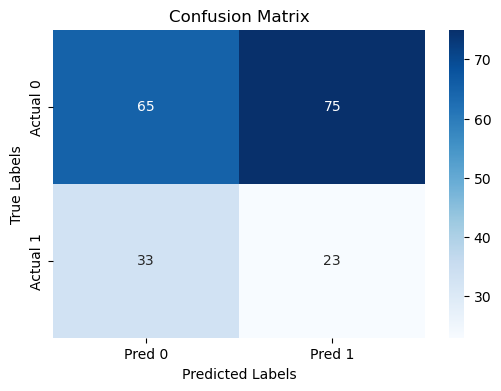

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


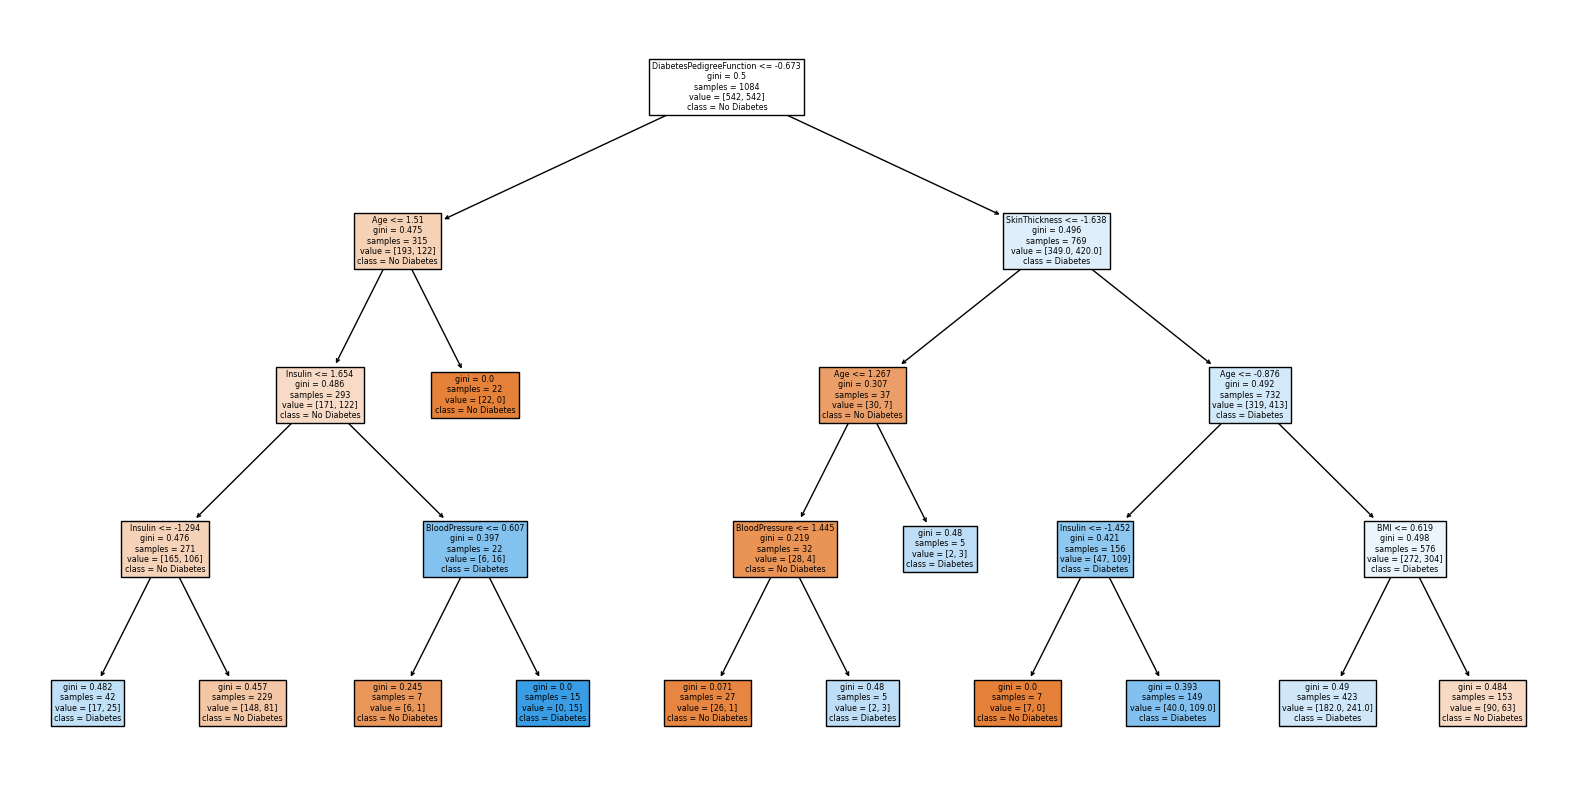

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()


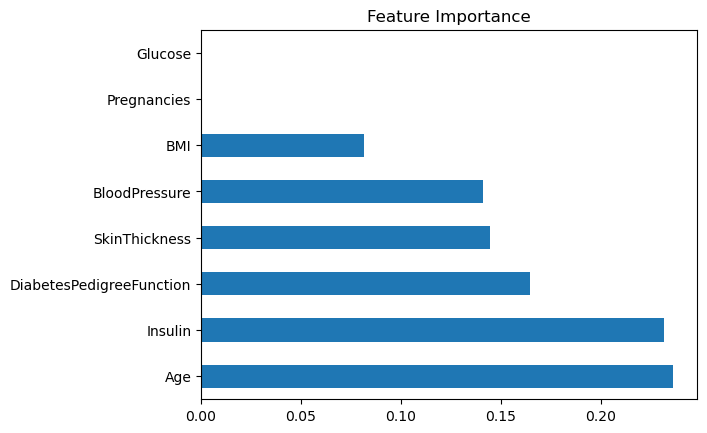

In [22]:
import pandas as pd

importance = pd.Series(clf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='barh')
plt.title("Feature Importance")
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=10,min_samples_leaf=5,class_weight='balanced',random_state=42           
)
rf_model.fit(X_train_bal, y_train_bal)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4744897959183674

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.48      0.57       140
           1       0.26      0.46      0.34        56

    accuracy                           0.47       196
   macro avg       0.48      0.47      0.45       196
weighted avg       0.57      0.47      0.50       196

Confusion Matrix:
 [[67 73]
 [30 26]]


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_split=10,min_samples_leaf=5,random_state=42           
)
rf_model.fit(X_train_bal, y_train_bal)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5051020408163265

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63       140
           1       0.21      0.27      0.24        56

    accuracy                           0.51       196
   macro avg       0.44      0.43      0.44       196
weighted avg       0.54      0.51      0.52       196

Confusion Matrix:
 [[84 56]
 [41 15]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier( class_weight='balanced',n_estimators=300,max_depth=None, min_samples_split=2, min_samples_leaf=1,random_state=42           
)
rf_model.fit(X_train_bal, y_train_bal)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5867346938775511

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72       140
           1       0.21      0.16      0.18        56

    accuracy                           0.59       196
   macro avg       0.45      0.46      0.45       196
weighted avg       0.55      0.59      0.57       196

Confusion Matrix:
 [[106  34]
 [ 47   9]]


In [26]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    scale_pos_weight=137/63,  # or better: len(class0)/len(class1)
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5612244897959183
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       140
           1       0.27      0.32      0.30        56

    accuracy                           0.56       196
   macro avg       0.49      0.49      0.49       196
weighted avg       0.58      0.56      0.57       196

[[92 48]
 [38 18]]


C:\Users\kingl\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [27]:
df_new = df.copy()
df_new['Age_BMI'] = df['Age'] * df['BMI']
df_new['Glucose_Insulin'] = df['Glucose'] / (df['Insulin'] + 1)  
df_new['Pregnancy_AgeRatio'] = df['Pregnancies'] / (df['Age'] + 1)
X = df_new.drop('Diagnosis', axis=1)
y = df_new['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)


In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_bal, y_train_bal)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
Accuracy: 0.5357142857142857
[[88 49]
 [42 17]]
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       137
           1       0.26      0.29      0.27        59

    accuracy                           0.54       196
   macro avg       0.47      0.47      0.47       196
weighted avg       0.55      0.54      0.54       196



In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)
rf_model.fit(X_train_bal, y_train_bal)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.5969387755102041
[[106  31]
 [ 48  11]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       137
           1       0.26      0.19      0.22        59

    accuracy                           0.60       196
   macro avg       0.48      0.48      0.47       196
weighted avg       0.56      0.60      0.57       196



In [32]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_bal, y_train_bal)
y_pred_svm = svm_model.predict(X_test)

print("SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM
Accuracy: 0.46938775510204084
[[46 91]
 [13 46]]
              precision    recall  f1-score   support

           0       0.78      0.34      0.47       137
           1       0.34      0.78      0.47        59

    accuracy                           0.47       196
   macro avg       0.56      0.56      0.47       196
weighted avg       0.65      0.47      0.47       196



In [33]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_bal, y_train_bal)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes
Accuracy: 0.3877551020408163
[[ 34 103]
 [ 17  42]]
              precision    recall  f1-score   support

           0       0.67      0.25      0.36       137
           1       0.29      0.71      0.41        59

    accuracy                           0.39       196
   macro avg       0.48      0.48      0.39       196
weighted avg       0.55      0.39      0.38       196



In [34]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_model.fit(X_train_bal, y_train_bal)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression
Accuracy: 0.5255102040816326
[[75 62]
 [31 28]]
              precision    recall  f1-score   support

           0       0.71      0.55      0.62       137
           1       0.31      0.47      0.38        59

    accuracy                           0.53       196
   macro avg       0.51      0.51      0.50       196
weighted avg       0.59      0.53      0.54       196



C:\Users\kingl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


C:\Users\kingl\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost
Accuracy: 0.576530612244898
[[98 39]
 [44 15]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       137
           1       0.28      0.25      0.27        59

    accuracy                           0.58       196
   macro avg       0.48      0.48      0.48       196
weighted avg       0.57      0.58      0.57       196



In [36]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm,
    "Naive Bayes": y_pred_nb,
    "Logistic Regression": y_pred_log,
    "XGBoost": y_pred_xgb
}

metrics = []
for name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

results_df = pd.DataFrame(metrics).sort_values(by="F1 Score", ascending=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
2                  SVM  0.469388   0.335766  0.779661  0.469388
3          Naive Bayes  0.387755   0.289655  0.711864  0.411765
4  Logistic Regression  0.525510   0.311111  0.474576  0.375839
0        Decision Tree  0.535714   0.257576  0.288136  0.272000
5              XGBoost  0.576531   0.277778  0.254237  0.265487
1        Random Forest  0.596939   0.261905  0.186441  0.217822


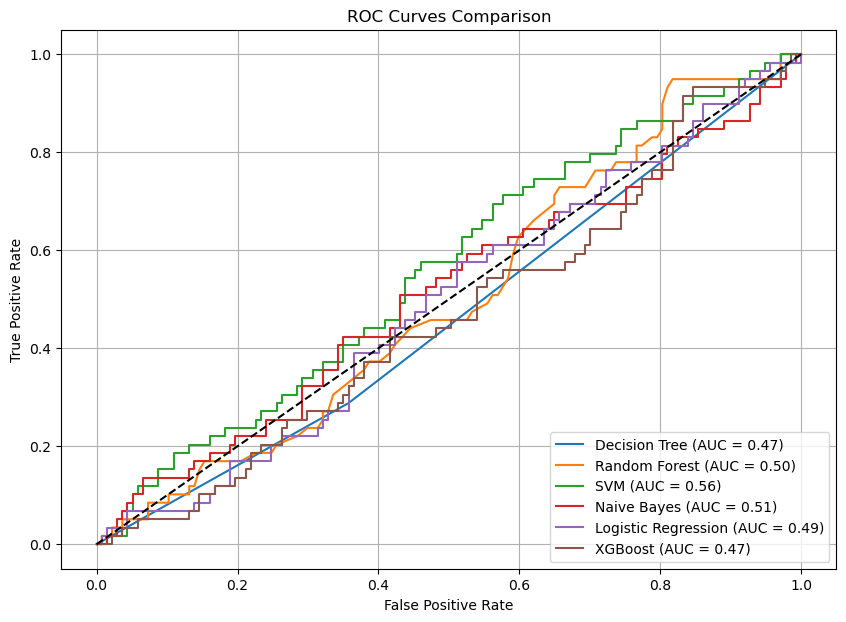

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for name, y_pred in models.items():
    # For ROC, need predicted probabilities if available
    if name == "SVM":
        y_proba = svm_model.decision_function(X_test)
    elif name == "XGBoost":
        y_proba = xgb_model.predict_proba(X_test)[:, 1]
    else:
        model_obj = {
            "Decision Tree": dt_model,
            "Random Forest": rf_model,
            "Naive Bayes": nb_model,
            "Logistic Regression": log_model,
        }[name]
        y_proba = model_obj.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()
